# Сначала подгрузим данные с гуглдока #

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%ls

drive/  sample_data/


In [5]:
% cd drive/MyDrive/

/content/drive/MyDrive


In [6]:
%ls

 1.JPG
'8 билет.pdf.gdoc'
'Colab Notebooks'/
 ColortypesDone1@
 ColortypesDone2@
 ColortypesDone3@
 ColortypesDone4@
 cropped_european_images_brightness.txt
 cropped_european_images_contrasts.txt
 cropped_european_images_names.txt
 cropped_images_brightness.txt
 cropped_images_contrasts.txt
 cropped_images_names.txt
 DIHT_lectures@
'ege18 (1).doc'
 ege27-C4.doc
 fiz_demo_2016.pdf
 hdr_images_brightness.txt
 hdr_images_contrasts.txt
 hdr_images_names.txt
'input1 (1).dat.gdoc'
 input1.dat.gdoc
'input2 (1).dat.gdoc'
 input2.dat.gdoc
 list_of_all_images_quality_assesments.txt
 M1_9_15_3.pdf
'Nashe postchelovecheskoe buduschee_ Posledstviya biotehnologicheskoj revolyucii .fb2.gdoc'
'Novy_textovy_dokument_7 (1).txt.gdoc'
 Novy_textovy_dokument_7.txt.gdoc
 Novy_textovy_dokument_8.txt.gdoc
 old_data_separations/
 output1.dat.gdoc
'output2 (1).dat.gdoc'
'output2 (2).dat.gdoc'
 output2.dat.gdoc
 output3.dat.gdoc
 passed_images_brightness.txt
 passed_images_names.txt
 pre_pocessed_data_brightness

In [7]:
import glob

In [8]:
list_of_cropped_images = glob.glob('pre-processed/Crop  + angle filtration  (less than 22.5 deg)/*/*.png')
list_of_cropped_european_images = glob.glob('pre-processed/Crop  + angle filtration  (less than 22.5 deg) european/*/*/*.png')
list_of_hdr_images = glob.glob('pre-processed/HDR/files .hdr mapped to .png/*/*/*.png')
list_of_hdr_european_images = glob.glob('pre-processed/hdr filtered european/*/*/*.png')

# Теперь пройдемся по всем спискам данных, составляя лист из яркостей изображений и лист из их контрастности. И сразу же делая их гистограммы#

In [9]:
from skimage.exposure import is_low_contrast
from skimage.io import imread
from PIL import ImageStat, Image
import numpy as np
import matplotlib.pyplot as plt
import torch

In [10]:
def brightness(image):
   im = Image.open(image).convert('L')
   stat = ImageStat.Stat(im)
   return stat.mean[0]

In [11]:
def contrast(image):
    im = Image.open(image).convert('L')
    im_brigthness_info = im.getextrema()
    return_val = (im_brigthness_info[1] - im_brigthness_info[0]) / (im_brigthness_info[0] + im_brigthness_info[1])
    return return_val

#1#

In [12]:
cropped_images_names = []
cropped_images_brightness = []
cropped_images_contrasts = []

In [163]:
for image_name in list_of_cropped_images:
    cropped_images_names.append(image_name)
    cropped_images_brightness.append(brightness(image_name))
    cropped_images_contrasts.append(contrast(image_name))

Сохраним значения

In [77]:
im_names = cropped_images_names
im_brightness = cropped_images_brightness
im_contrasts = cropped_images_contrasts

In [78]:
#torch.save(im_names, 'cropped_images_names.txt')
#torch.save(im_brightness, 'cropped_images_brightness.txt')
#torch.save(im_contrasts, 'cropped_images_contrasts.txt')

In [79]:
im_names = torch.load('cropped_images_names.txt')
im_brightness = torch.load('cropped_images_brightness.txt')
im_contrasts = torch.load('cropped_images_contrasts.txt')

#  Сделаем гистограмму по яркости и контрасту#

Гистрограмма по яркости

In [80]:
b_max = max(im_brightness)

In [17]:
b_min = min(im_brightness)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

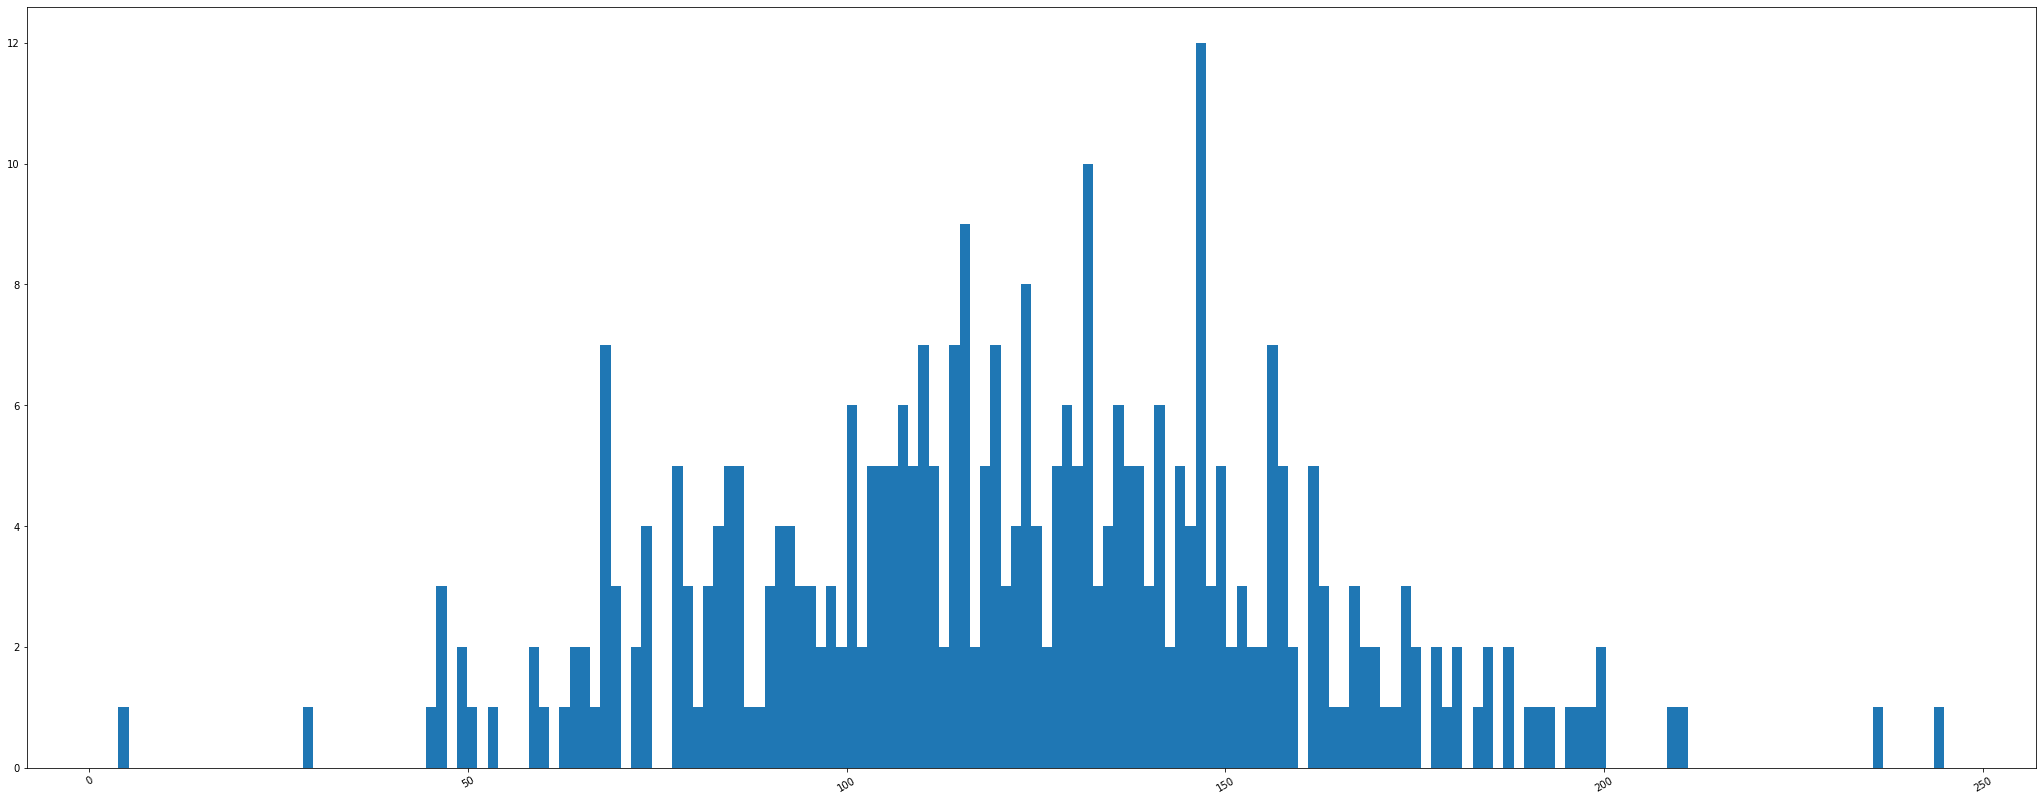

In [81]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [82]:
stopping_value = round(0.1 * len(im_names))

In [83]:
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

52
74.25263155623371


In [84]:
left_border = edges[i]

In [85]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

119
165.002119160463


In [86]:
right_border = edges[i]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

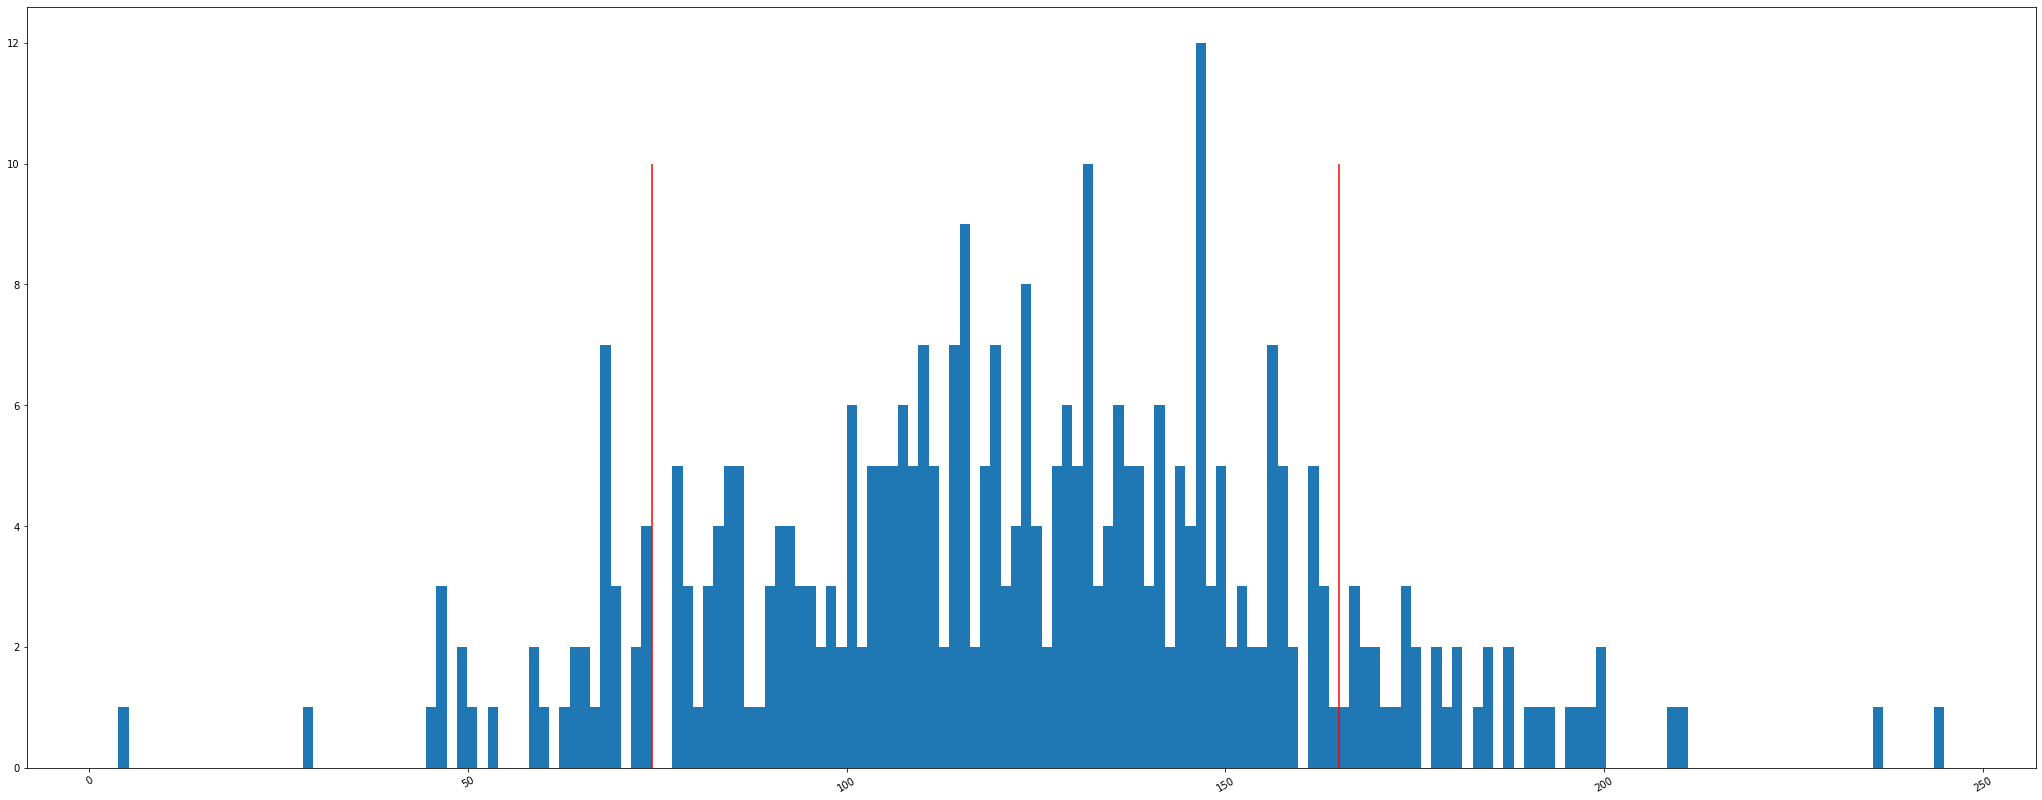

In [87]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.vlines(left_border, 0, 10, color='red', label='left_border')
plt.vlines(right_border, 0, 10, color='red', label='right_border')
plt.xticks(rotation=30)

In [88]:
print("Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):")
print("граница слева равна {}".format(left_border))
print("граница справа равна {}".format(right_border))

Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):
граница слева равна 74.25263155623371
граница справа равна 165.002119160463


Гистограмма по контрасту

(array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 <a list of 8 Text major ticklabel objects>)

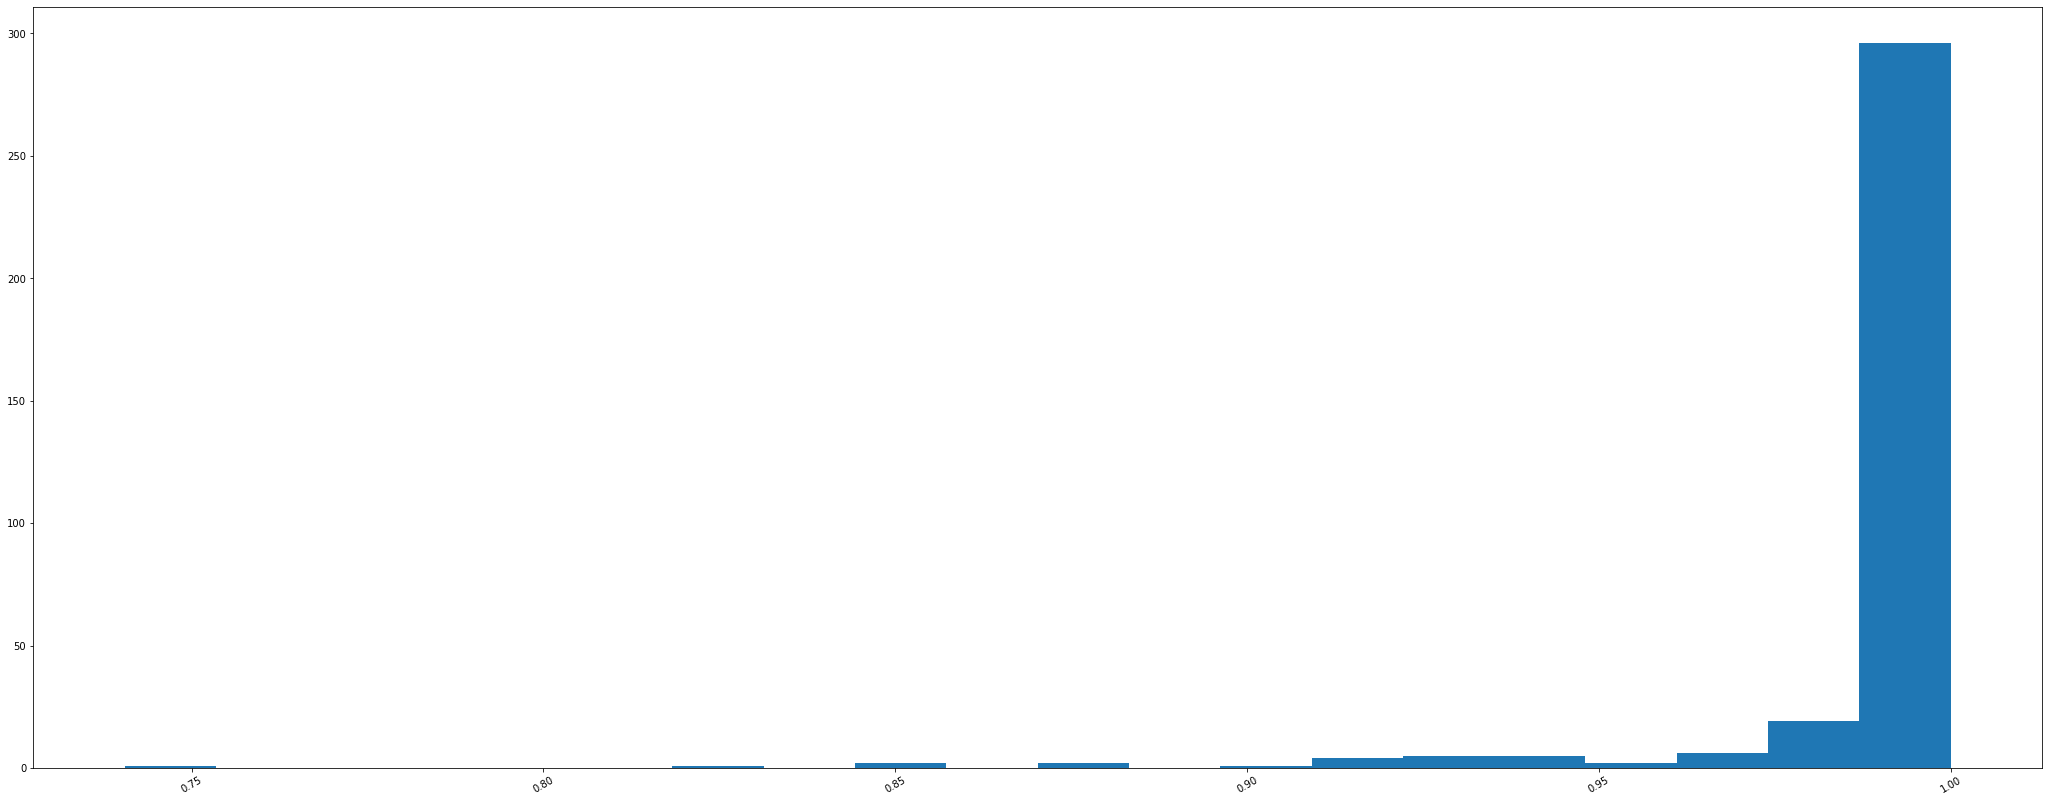

In [89]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_contrasts), bins=20)
plt.xticks(rotation=30)

#2#

In [90]:
cropped_european_images_names = []
cropped_european_images_brightness = []
cropped_european_images_contrasts = []

In [167]:
for image_name in list_of_cropped_european_images:
    cropped_european_images_names.append(image_name)
    cropped_european_images_brightness.append(brightness(image_name))
    cropped_european_images_contrasts.append(contrast(image_name))

Сохраним значения

In [91]:
im_names = cropped_european_images_names
im_brightness = cropped_european_images_brightness
im_contrasts = cropped_european_images_contrasts

In [92]:
#torch.save(im_names, 'cropped_european_images_names.txt')
#torch.save(im_brightness, 'cropped_european_images_brightness.txt')
#torch.save(im_contrasts, 'cropped_european_images_contrasts.txt')

In [93]:
im_names = torch.load('cropped_european_images_names.txt')
im_brightness = torch.load('cropped_european_images_brightness.txt')
im_contrasts = torch.load('cropped_european_images_contrasts.txt')

#  Сделаем гистограмму по яркости и контрасту#

Гистрограмма по яркости

In [94]:
b_max = max(im_brightness)

In [95]:
b_min = min(im_brightness)

(array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Text major ticklabel objects>)

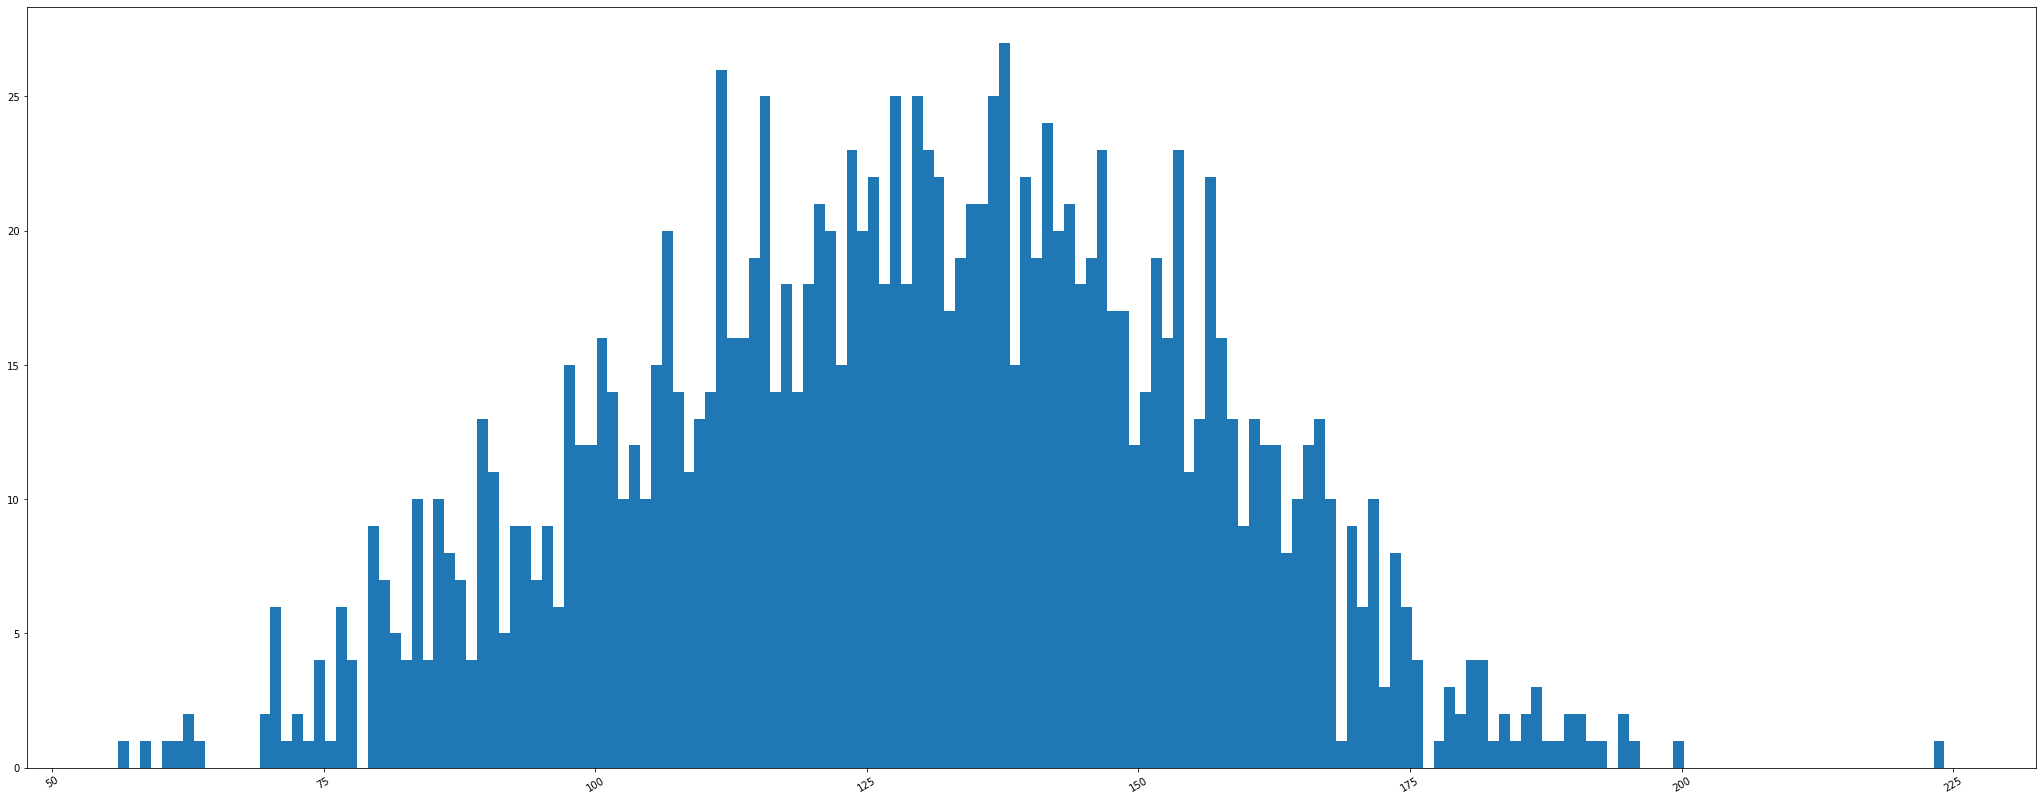

In [97]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [98]:
stopping_value = round(0.1 * len(im_names))

In [99]:
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

38
94.12086681547619


In [100]:
left_border = edges[i]

In [101]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

105
161.14735026041666


In [102]:
right_border = edges[i]

(array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Text major ticklabel objects>)

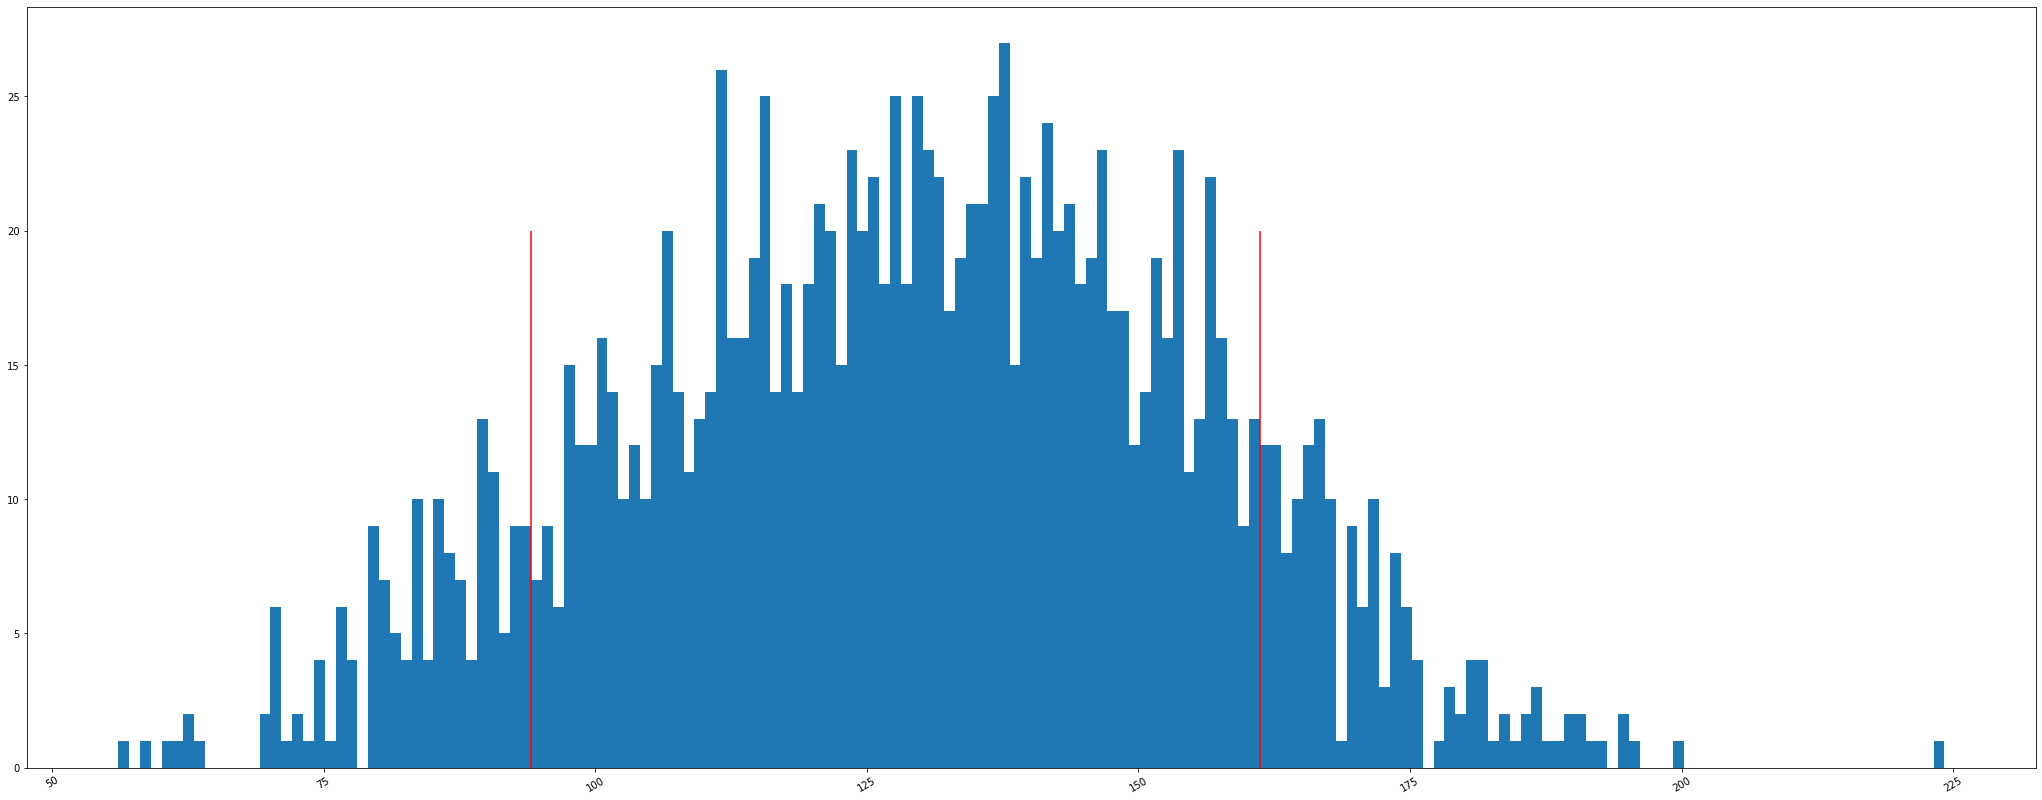

In [104]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.vlines(left_border, 0, 20, color='red', label='left_border')
plt.vlines(right_border, 0, 20, color='red', label='right_border')
plt.xticks(rotation=30)

In [105]:
print("Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):")
print("граница слева равна {}".format(left_border))
print("граница справа равна {}".format(right_border))

Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):
граница слева равна 94.12086681547619
граница справа равна 161.14735026041666


Гистограмма по контрасту

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 7 Text major ticklabel objects>)

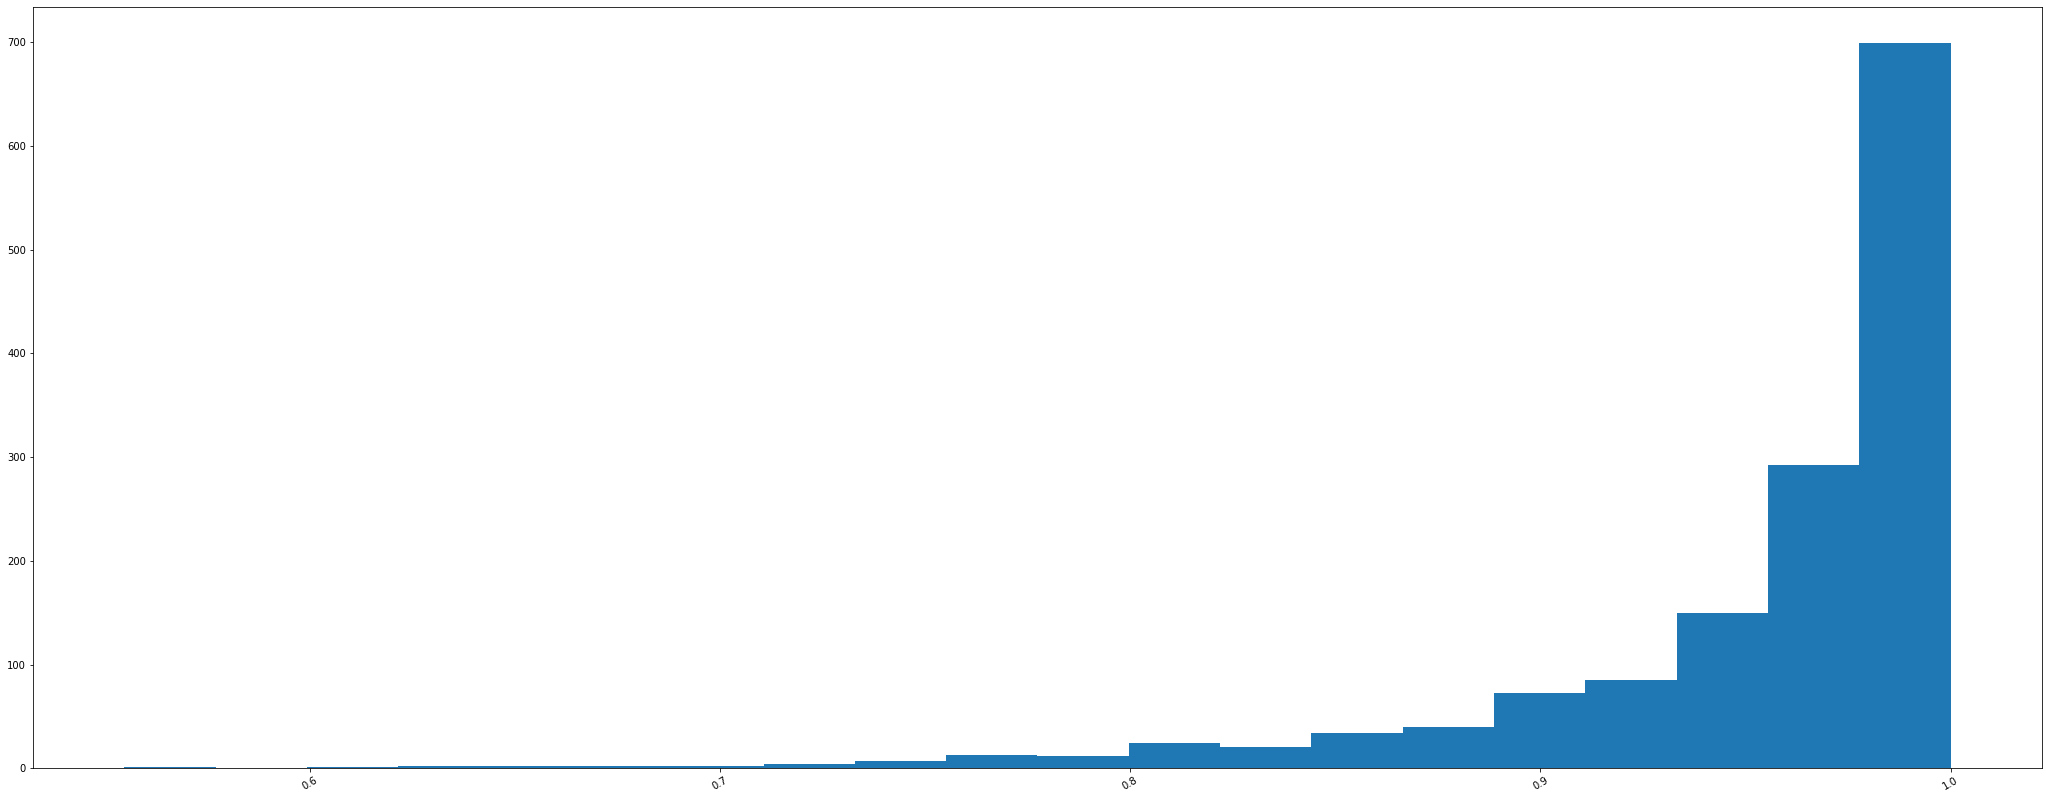

In [106]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_contrasts), bins=20)
plt.xticks(rotation=30)

#3#

In [107]:
hdr_images_names = []
hdr_images_brightness = []
hdr_images_contrasts = []

In [43]:
for image_name in list_of_hdr_images:
    hdr_images_names.append(image_name)
    hdr_images_brightness.append(brightness(image_name))
    hdr_images_contrasts.append(contrast(image_name))

KeyboardInterrupt: ignored

Сохраним значения

In [108]:
im_names = hdr_images_names
im_brightness = hdr_images_brightness
im_contrasts = hdr_images_contrasts

In [109]:
#torch.save(im_names, 'hdr_images_names.txt')
#torch.save(im_brightness, 'hdr_images_brightness.txt')
#torch.save(im_contrasts, 'hdr_images_contrasts.txt')

In [110]:
im_names = torch.load('hdr_images_names.txt')
im_brightness = torch.load('hdr_images_brightness.txt')
im_contrasts = torch.load('hdr_images_contrasts.txt')

#  Сделаем гистограмму по яркости и контрасту#

Гистрограмма по яркости

In [111]:
b_max = max(im_brightness)

In [112]:
b_min = min(im_brightness)

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 10 Text major ticklabel objects>)

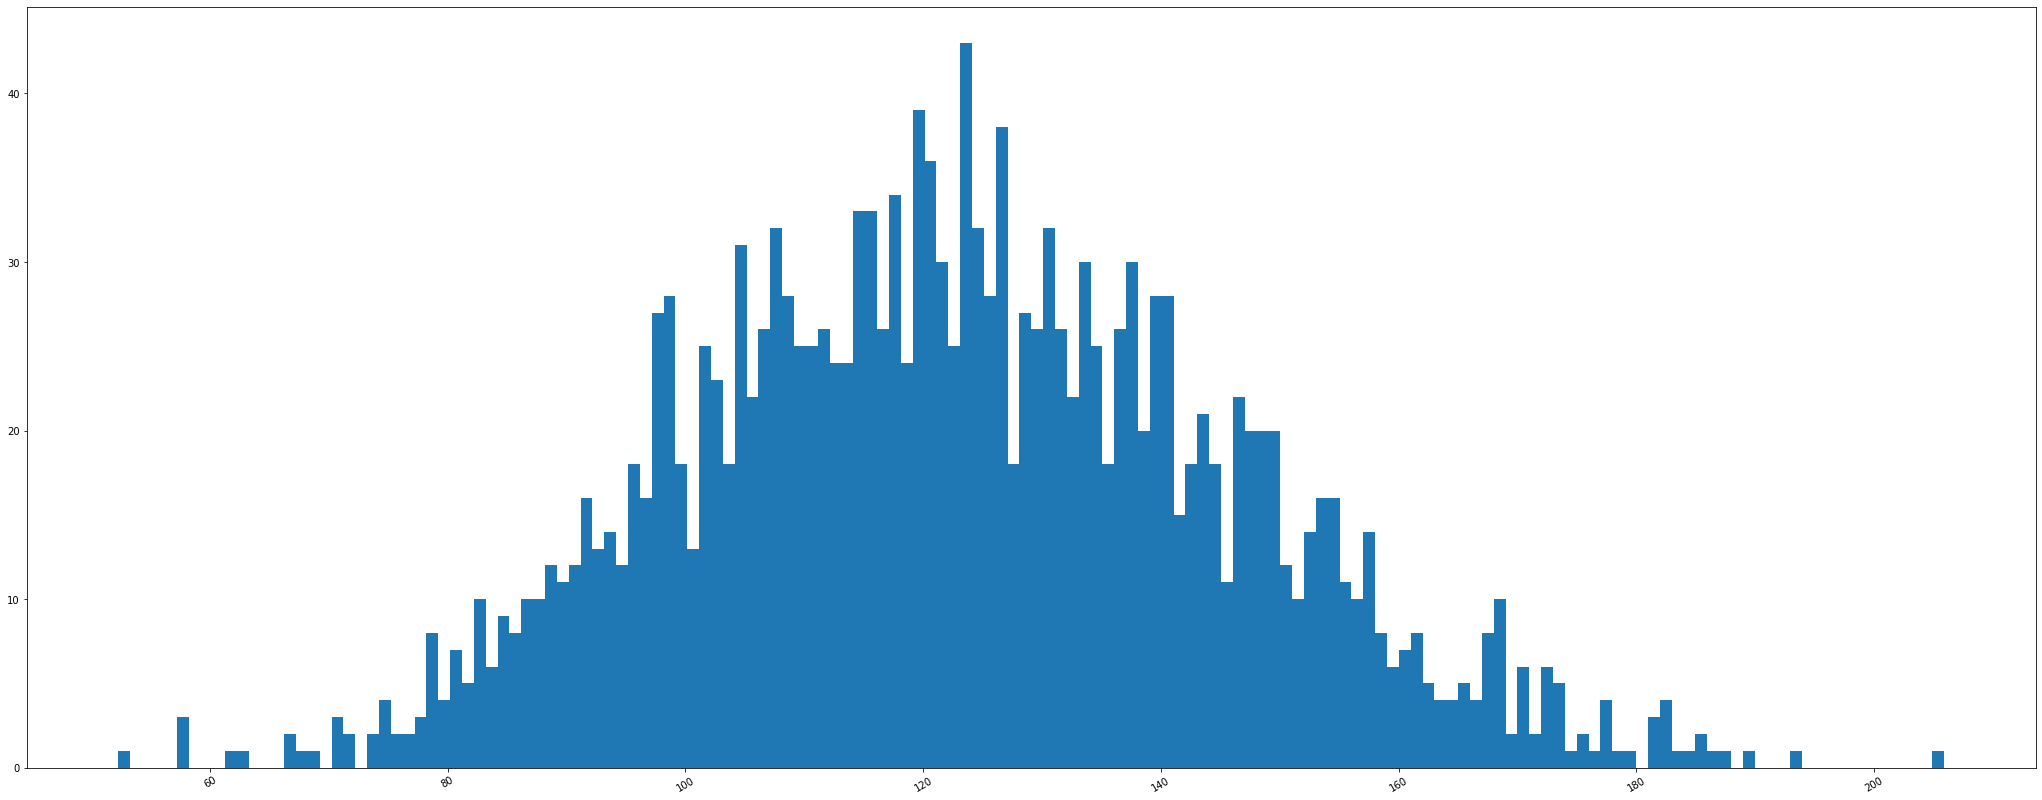

In [113]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [114]:
stopping_value = round(0.1 * len(im_names))

In [115]:
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

42
94.17734611742424


In [116]:
left_border = edges[i]

In [117]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

100
152.0351364650974


In [118]:
right_border = edges[i]

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 10 Text major ticklabel objects>)

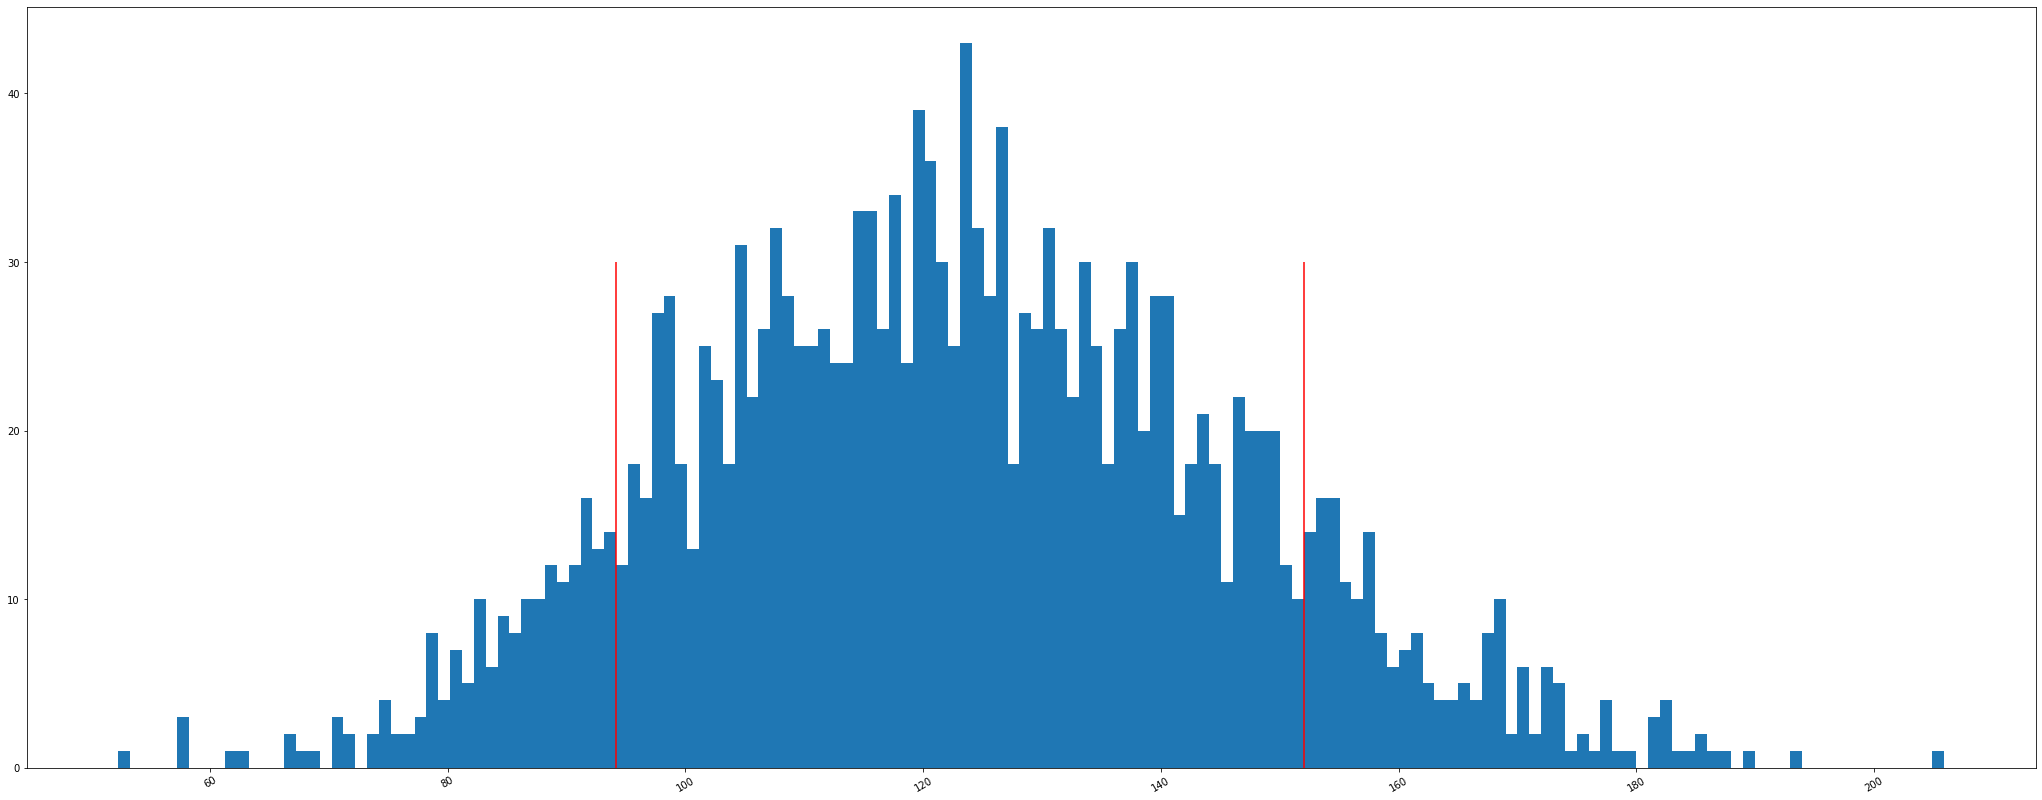

In [120]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.vlines(left_border, 0, 30, color='red', label='left_border')
plt.vlines(right_border, 0, 30, color='red', label='right_border')
plt.xticks(rotation=30)

In [121]:
print("Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):")
print("граница слева равна {}".format(left_border))
print("граница справа равна {}".format(right_border))

Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):
граница слева равна 94.17734611742424
граница справа равна 152.0351364650974


Гистограмма по контрасту

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 7 Text major ticklabel objects>)

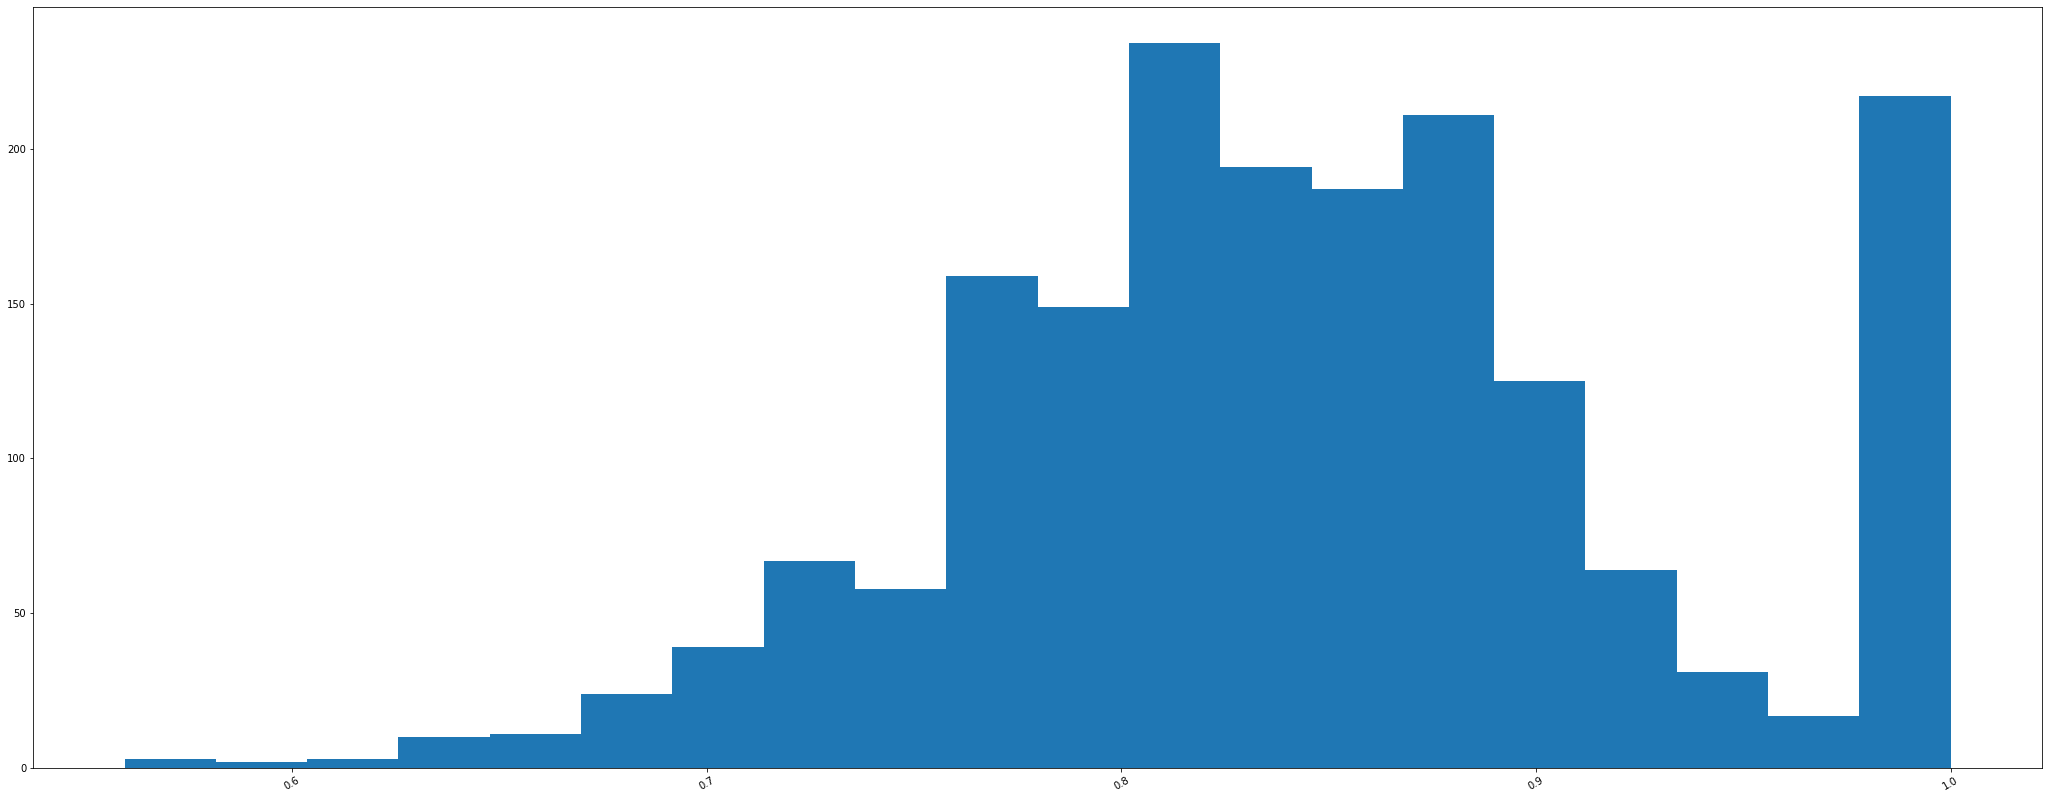

In [122]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_contrasts), bins=20)
plt.xticks(rotation=30)

#4#

In [123]:
hdr_european_images_names = []
hdr_european_images_brightness = []
hdr_european_images_contrasts = []

In [60]:
for image_name in list_of_hdr_european_images:
    hdr_european_images_names.append(image_name)
    hdr_european_images_brightness.append(brightness(image_name))
    hdr_european_images_contrasts.append(contrast(image_name))

Сохраним значения

In [124]:
im_names = hdr_european_images_names
im_brightness = hdr_european_images_brightness
im_contrasts = hdr_european_images_contrasts

In [125]:
#torch.save(im_names, 'hdr_european_images_names.txt')
#torch.save(im_brightness, 'hdr_european_images_brightness.txt')
#torch.save(im_contrasts, 'hdr_european_images_contrasts.txt')

In [126]:
im_names = torch.load('hdr_european_images_names.txt')
im_brightness = torch.load('hdr_european_images_brightness.txt')
im_contrasts = torch.load('hdr_european_images_contrasts.txt')

#  Сделаем гистограмму по яркости и контрасту#

Гистрограмма по яркости

In [127]:
b_max = max(im_brightness)

In [128]:
b_min = min(im_brightness)

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 10 Text major ticklabel objects>)

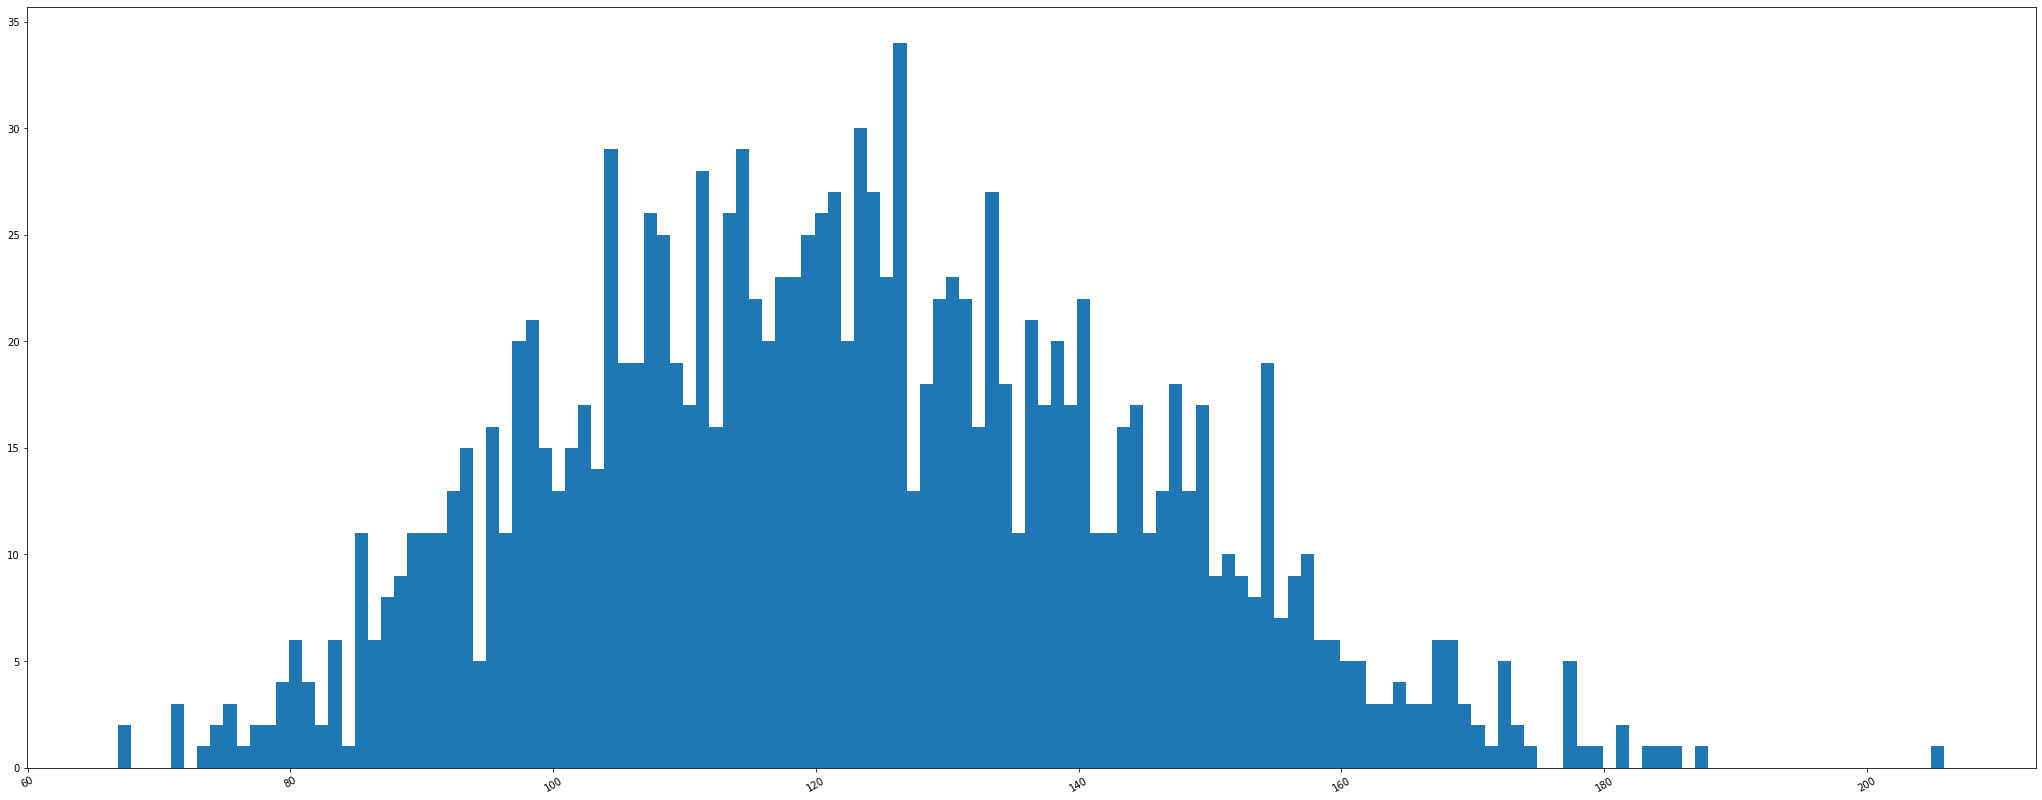

In [130]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.xticks(rotation=30)

# Проведем линию по 10% всех самых ярких и самых тусклых картинок #

In [131]:
stopping_value = round(0.1 * len(im_names))

In [132]:
current_count = 0
i = 0

while current_count < stopping_value:
  current_count += counts[i]
  i += 1

print(i)
print(edges[i])

28
94.89875196717625


In [133]:
left_border = edges[i]

In [134]:
current_count = 0
i = len(counts) - 1

while current_count < stopping_value:
  current_count += counts[i]
  i -= 1

print(i)
print(edges[i])

84
150.90076110986212


In [135]:
right_border = edges[i]

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 10 Text major ticklabel objects>)

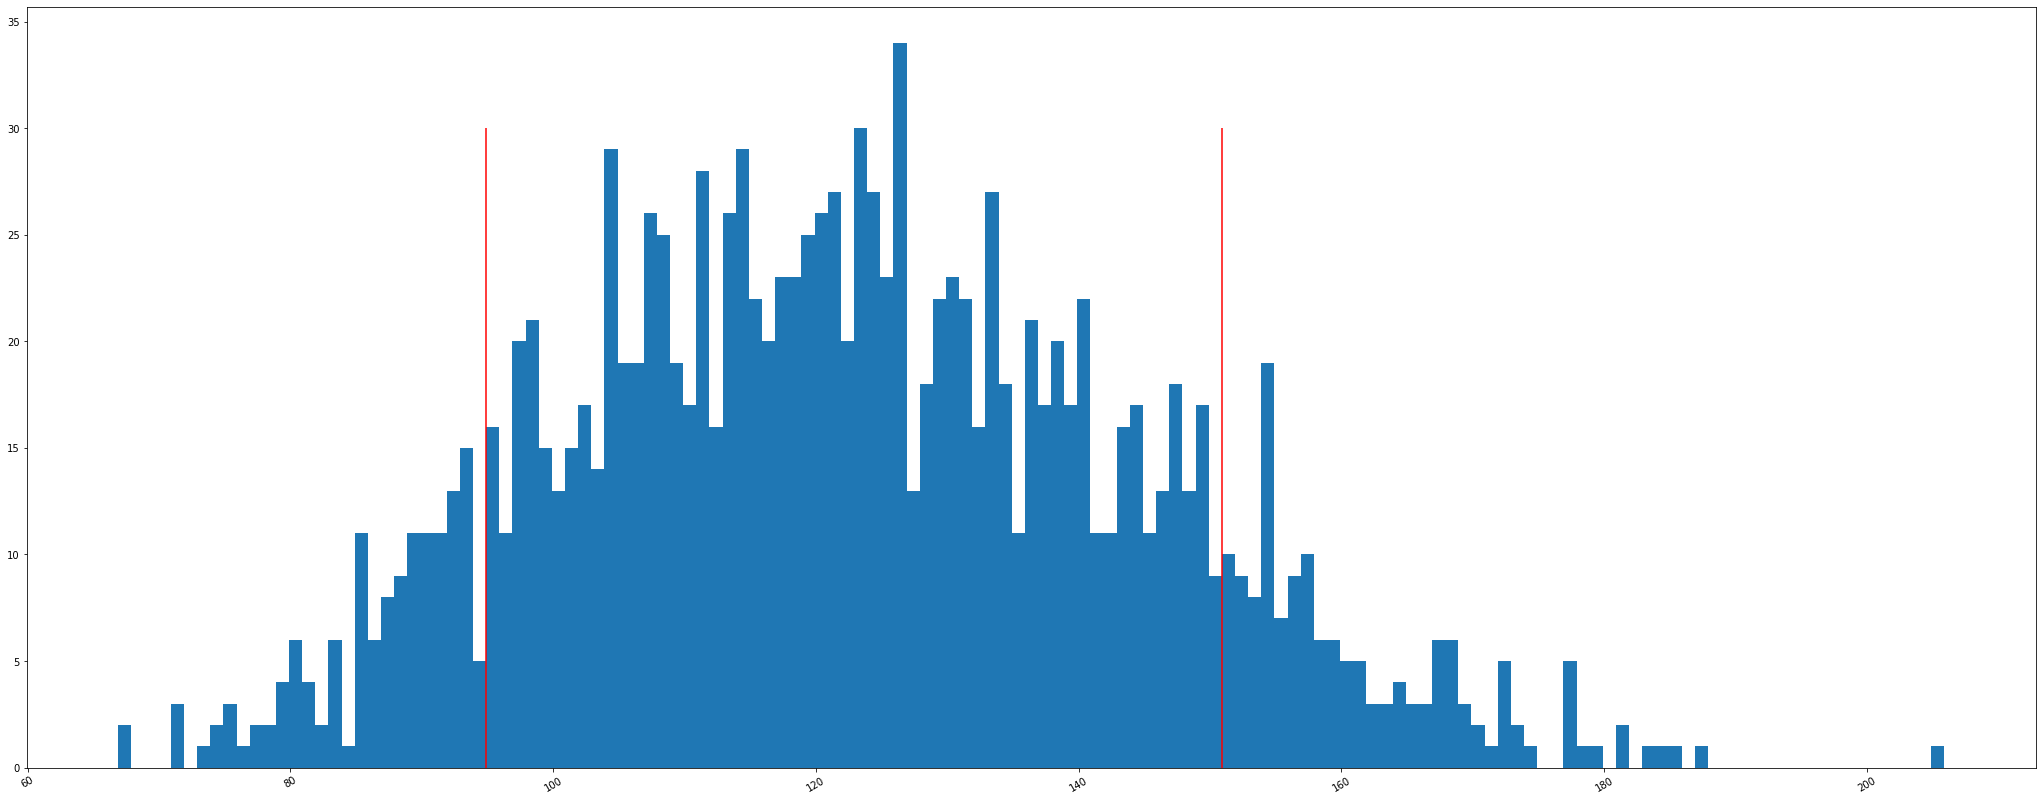

In [139]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_brightness), bins=round(b_max - b_min))
plt.vlines(left_border, 0, 30, color='red', label='left_border')
plt.vlines(right_border, 0, 30, color='red', label='right_border')
plt.xticks(rotation=30)

In [140]:
print("Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):")
print("граница слева равна {}".format(left_border))
print("граница справа равна {}".format(right_border))

Получились следующие границы яркости для Crop  + angle filtration  (less than 22.5 deg):
граница слева равна 94.89875196717625
граница справа равна 150.90076110986212


Гистограмма по контрасту

(array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 7 Text major ticklabel objects>)

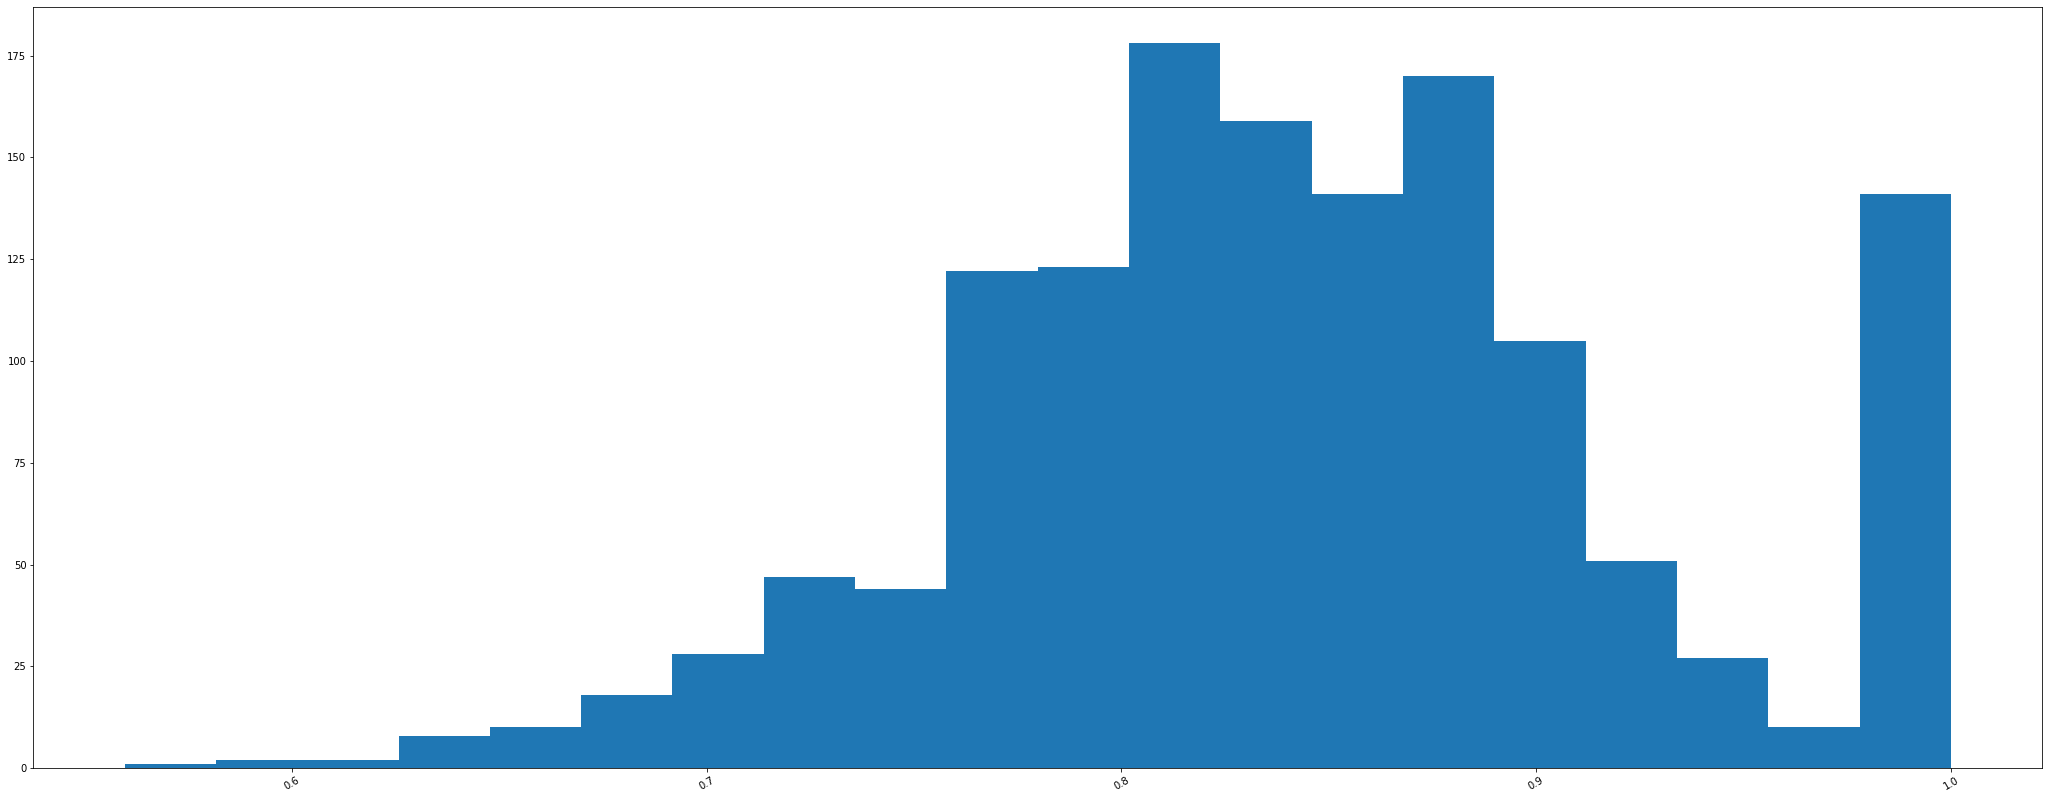

In [143]:
plt.figure(figsize=(36, 14))
counts, edges, plot = plt.hist(np.sort(im_contrasts), bins=20)
plt.xticks(rotation=30)

две ячейки для сохранения\выгрузки наших данных

In [ ]:
#torch.save(passed_images_names, 'passed_images_names.txt')
#torch.save(passed_images_brightness, 'passed_images_brightness.txt')

In [ ]:
passed_images_names = torch.load('passed_images_names.txt')
passed_images_brightness = torch.load('passed_images_brightness.txt')